In [237]:
import pandas as pd

In [238]:
df = pd.read_csv('baseline_df.csv')

In [239]:
df.columns

Index(['Unnamed: 0', 'index', 'Report_Run_Time', 'carrier', 'Trip_Type',
       'Airport_Route', 'price', 'overhead_bin', 'layover_count',
       'round_trip_duration', 'Carbon emissions estimate num',
       'carbon_emission% num', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay'],
      dtype='object')

In [240]:
df = df[[ 'carrier', 'Trip_Type','Airport_Route',
         'overhead_bin', 'layover_count','round_trip_duration', 'Carbon emissions estimate num',
   'Days_to_Fly', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay', 'price']]

In [241]:
columns_to_encode = ['carrier', 'Trip_Type', 'Airport_Route', 'overhead_bin',
                     'from_hour_segment', 'to_hour_segment','Holiday']

In [242]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [243]:
X = df.iloc[:,:-1]

In [244]:
Y = df.iloc[:,-1:]

In [245]:
encoded_values = {}
for column in columns_to_encode:
  X[column] = encode.fit_transform(X[column])
  encoded_values[column] = dict(zip(encode.classes_, encode.transform(encode.classes_)))

In [246]:
for column, values in encoded_values.items():
    print(pd.DataFrame(values.items()))

                      0  1
0                Alaska  0
1              American  1
2                 Delta  2
3              Frontier  3
4               JetBlue  4
5                Spirit  5
6  Sun Country Airlines  6
7           Third Party  7
8                United  8
             0  1
0      One Way  0
1  Rounds Trip  1
           0  1
0  EWR - LAX  0
1  JFK - LAX  1
2  LAX - EWR  2
3  LAX - JFK  3
4  LAX - LGA  4
5  LGA - LAX  5
                                       0  1
0     Additional charge for overhead bin  0
1  No additional charge for overhead bin  1
                 0  1
0  1. 12 AM - 3 AM  0
1   2. 3 AM - 6 AM  1
2   3. 6 AM - 9 AM  2
3  4. 9 AM - 12 PM  3
4  5. 12 PM - 3 PM  4
5   6. 3 PM - 6 PM  5
6   7. 6 PM - 9 PM  6
7  8. 9 PM - 12 AM  7
                 0  1
0  1. 12 AM - 3 AM  0
1   2. 3 AM - 6 AM  1
2   3. 6 AM - 9 AM  2
3  4. 9 AM - 12 PM  3
4  5. 12 PM - 3 PM  4
5   6. 3 PM - 6 PM  5
6   7. 6 PM - 9 PM  6
7  8. 9 PM - 12 AM  7
             0  1
0      Holiday  0


In [247]:
X.head(2)

,carrier,Trip_Type,Airport_Route,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,Days_to_Fly,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay
0,5,1,0,0,0.0,89,293,18,2,3,6.5,1,4
1,0,1,0,1,0.0,89,272,18,2,3,6.3,1,4


In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [250]:
X.head(2)

,carrier,Trip_Type,Airport_Route,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,Days_to_Fly,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay
0,5,1,0,0,0.0,89,293,18,2,3,6.5,1,4
1,0,1,0,1,0.0,89,272,18,2,3,6.3,1,4


In [251]:
X.columns

Index(['carrier', 'Trip_Type', 'Airport_Route', 'overhead_bin',
       'layover_count', 'round_trip_duration', 'Carbon emissions estimate num',
       'Days_to_Fly', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay'],
      dtype='object')

In [252]:
X_train.shape

(83080, 13)

In [253]:
Y_train.shape

(83080, 1)

In [254]:
from sklearn.ensemble import RandomForestRegressor
RF_Regressor = RandomForestRegressor()
RF_Regressor.fit(X_train, Y_train)

<ipython-input-254-10d325ea8df2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_Regressor.fit(X_train, Y_train)


RandomForestRegressor()

In [255]:
Y_pred = RF_Regressor.predict(X_test)

In [256]:
from sklearn.metrics import r2_score
rf_r2_score = r2_score(Y_test,Y_pred)
rf_r2_score

0.8801807753332163

In [257]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

36.81306426345681

In [259]:
Y_test = Y_test.reset_index()

In [260]:
Y_pred = pd.DataFrame(Y_pred, columns=['price_pred'])
Y_pred

,price_pred
0,234.236667
1,309.850000
2,416.430000
3,582.240000
4,152.358333
...,...
20765,436.658333
20766,553.120000
20767,810.140000
20768,509.702500


In [261]:
Y_test = pd.concat([Y_test, Y_pred], axis = 1)
Y_test

,index,price,price_pred
0,13833,246.0,234.236667
1,29862,324.0,309.850000
2,87935,417.0,416.430000
3,93851,558.0,582.240000
4,34272,168.0,152.358333
...,...,...,...
20765,62880,426.0,436.658333
20766,37543,715.0,553.120000
20767,53145,798.0,810.140000
20768,48294,509.0,509.702500


In [262]:
Y_test['Diff'] = Y_test['price'] - Y_test['price_pred']
Y_test

,index,price,price_pred,Diff
0,13833,246.0,234.236667,11.763333
1,29862,324.0,309.850000,14.150000
2,87935,417.0,416.430000,0.570000
3,93851,558.0,582.240000,-24.240000
4,34272,168.0,152.358333,15.641667
...,...,...,...,...
20765,62880,426.0,436.658333,-10.658333
20766,37543,715.0,553.120000,161.880000
20767,53145,798.0,810.140000,-12.140000
20768,48294,509.0,509.702500,-0.702500


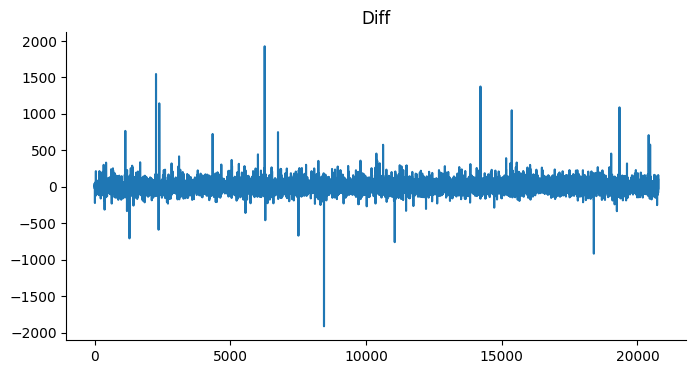

In [263]:
# @title Diff

from matplotlib import pyplot as plt
Y_test['Diff'].plot(kind='line', figsize=(8, 4), title='Diff')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

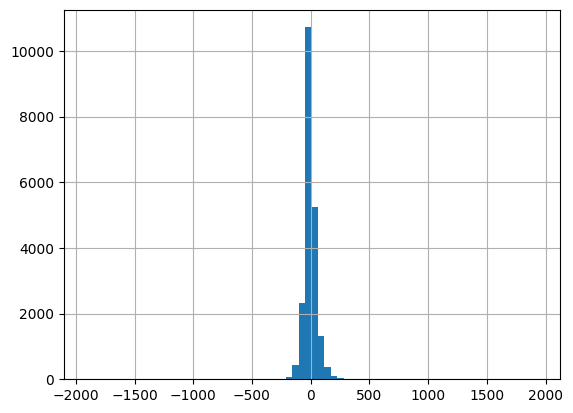

In [264]:
Y_test['Diff'].hist(bins=70)

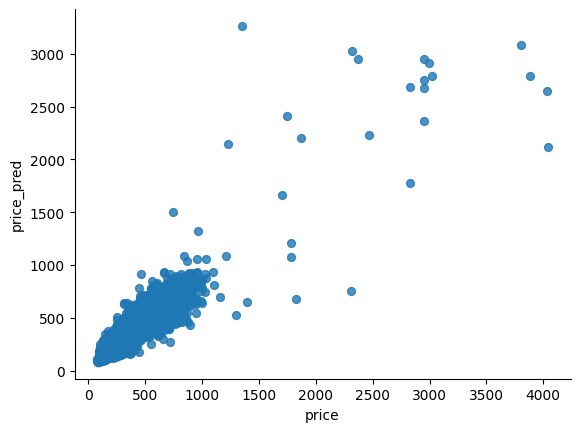

In [265]:
# @title price vs price_pred

from matplotlib import pyplot as plt
Y_test.plot(kind='scatter', x='price', y='price_pred', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [266]:
df.columns

Index(['carrier', 'Trip_Type', 'Airport_Route', 'overhead_bin',
       'layover_count', 'round_trip_duration', 'Carbon emissions estimate num',
       'Days_to_Fly', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay', 'price'],
      dtype='object')